In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [10]:
iris = load_iris()

X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

In [11]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C = 1, loss = 'hinge'))
])

In [12]:
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [13]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [14]:
from sklearn.svm import SVC

In [16]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', SVC(kernel = 'linear', C = 1))
])

In [17]:
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [21]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [22]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [78]:
X, y = make_moons(noise = 0.2)

In [65]:
polynomial_svm_clf = Pipeline([
    ('poly_feature', PolynomialFeatures(degree = 3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(max_iter = 10000, C = 10, loss = 'hinge'))
])

In [79]:
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_feature',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=10000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [67]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'X2')

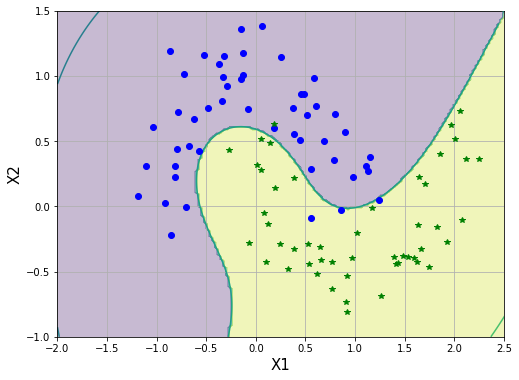

In [90]:
x0, x1 = np.meshgrid(
    np.linspace(-2, 3.5, 200).reshape(-1, 1),
    np.linspace(-1, 2.5, 200).reshape(-1, 1)
)

X_new = np.c_[x0.ravel(), x1.ravel()]

y_pred = polynomial_svm_clf.predict(X_new).reshape(x0.shape)
y_prob = polynomial_svm_clf.decision_function(X_new).reshape(x0.shape)

plt.figure(figsize = (8, 6))

plt.plot(X[y == 0, 0], X[y == 0, 1], 'bo')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'g*')

plt.contourf(x0, x1, y_pred, alpha = 0.3)
contour = plt.contour(x0, x1, y_prob)
plt.clabel(contour, inline = True, fontsize = 10)

plt.axis([-2, 2.5, -1, 1.5])
plt.grid(True)
plt.xlabel('X1', fontsize = 15)
plt.ylabel('X2', fontsize = 15, )